Model is not converging.  Current: 1299.655787301082 is not greater than 1299.6647726428819. Delta is -0.008985341799871094


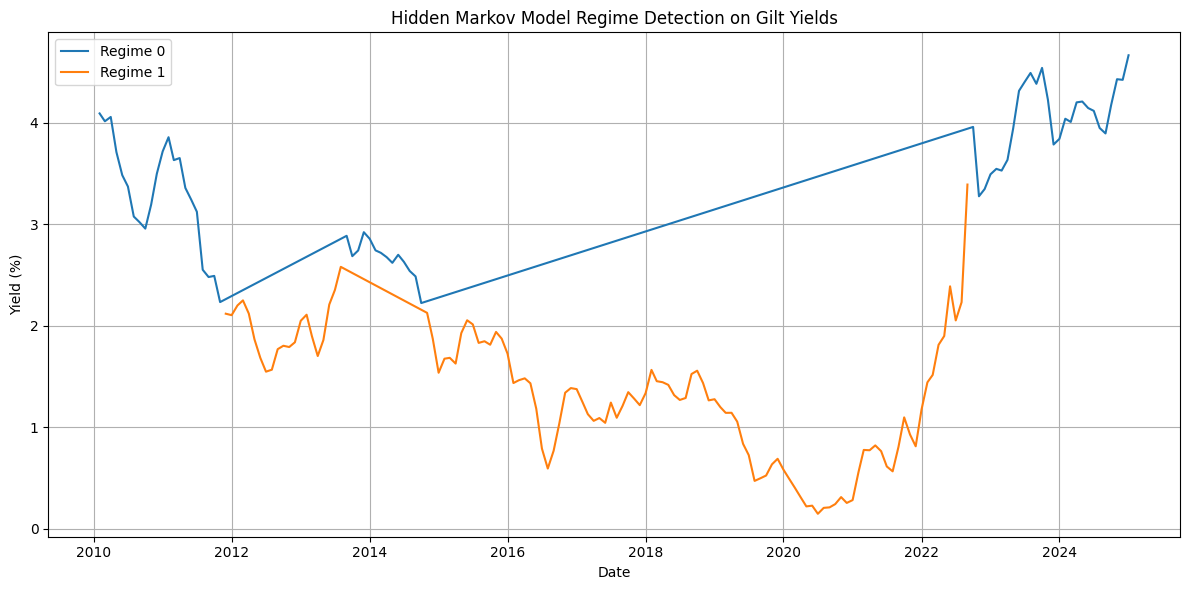

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# --- Step 1: Load and Prepare the Data ---

# Load yield data (already cleaned)
file_path = "20250520_Historical_Average_Daily_Conventional_Gilt_Yields.xlsx"
df = pd.read_excel(file_path, sheet_name=0, skiprows=3)
df.columns = ['Date', 'Short', 'Medium', 'Long', 'Ultra-Long']
df = df.dropna(subset=['Date', 'Medium'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Medium'] = df['Medium'] / 100  # convert to decimal

# Create features: yield level and monthly change
df['Yield_Change'] = df['Medium'].diff()
df_hmm = df[['Medium', 'Yield_Change']].dropna()

# --- Step 2: Fit the HMM ---

# Prepare the matrix for HMM: [yield, change]
X = df_hmm.values

# Fit a Gaussian HMM with 2 hidden states (QE/QT)
model = GaussianHMM(n_components=2, covariance_type='full', n_iter=1000, random_state=41)
model.fit(X)

# Predict hidden states
hidden_states = model.predict(X)

# --- Step 3: Visualize the Results ---

# Append hidden state labels to the dataframe
df_hmm['Regime'] = hidden_states
df_hmm['Regime_Label'] = df_hmm['Regime'].map({0: "QT", 1: "QE"})

# Plot yield with regime coloring
plt.figure(figsize=(12, 6))
for regime in np.unique(hidden_states):
    mask = df_hmm['Regime'] == regime
    plt.plot(df_hmm.index[mask], df_hmm['Medium'][mask] * 100, label=f"Regime {regime}")

plt.title("Hidden Markov Model Regime Detection on Gilt Yields")
plt.ylabel("Yield (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
print(model.means_)

[[ 3.52145770e-02 -3.75665794e-05]
 [ 1.33799554e-02  7.11569070e-05]]
